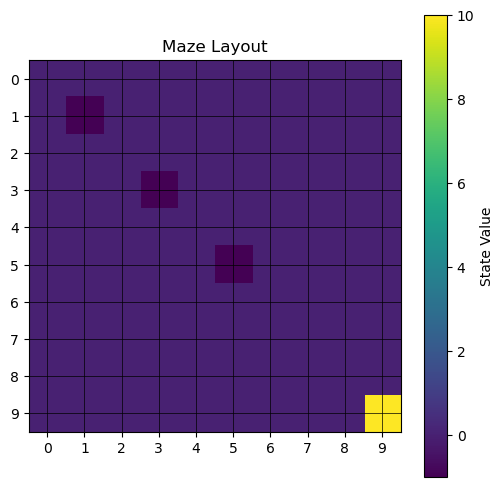

In [11]:
#Task 1
import numpy as np
import matplotlib.pyplot as plt
import random

# Maze dimensions and goal state
maze_size = (10, 10)
goal_position = (9, 9)  
fences = [(1, 1), (3, 3), (5, 5)]  

# Creating the ma
maze = np.zeros(maze_size)
for f in fences:
    maze[f] = -1
maze[goal_position] = 10

# Visualize the maze
def plot_maze(maze, title="Maze Layout"):
    plt.figure(figsize=(6, 6))
    plt.imshow(maze, cmap="viridis", origin="upper")
    plt.colorbar(label="State Value")
    plt.title(title)
    plt.xticks(range(10))
    plt.yticks(range(10))
    plt.grid(visible=True, which='both', color='black', linestyle='-', linewidth=0.5)
    plt.show()

plot_maze(maze)


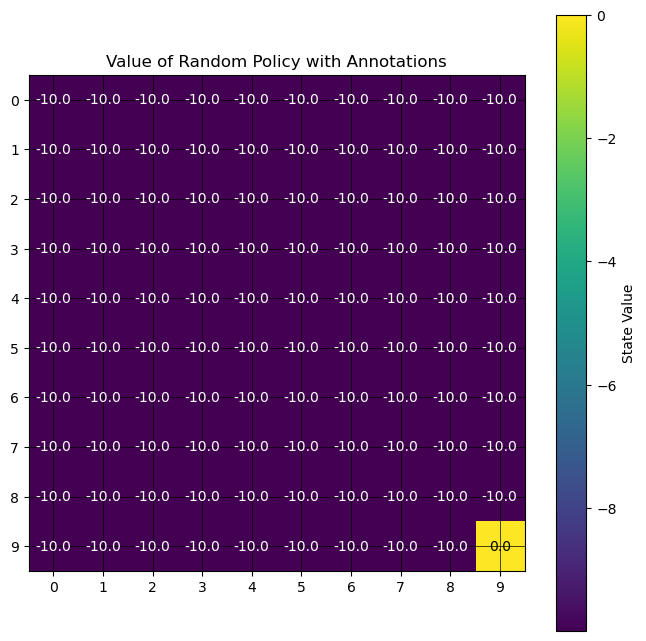

In [21]:
# Task 2
# set the penalty and discounty factor
R = -1  
gamma = 0.9  

# Initialize random policy 
policy = np.random.choice(['up', 'down', 'left', 'right'], size=maze_size)

# Initialize state-value function
V = np.zeros(maze_size)

# Policy Evaluation for random policy
def policy_evaluation(policy, maze, goal_position, iterations=100):
    V = np.zeros(maze.shape)
    for _ in range(iterations):
        for i in range(maze.shape[0]):
            for j in range(maze.shape[1]):
                if (i, j) == goal_position:
                    V[i, j] = 0
                    continue
                    
                # Determine next state based on the random policy action
                action = policy[i, j]
                if action == 'up': next_state = (max(i-1, 0), j)
                elif action == 'down': next_state = (min(i+1, maze.shape[0]-1), j)
                elif action == 'left': next_state = (i, max(j-1, 0))
                elif action == 'right': next_state = (i, min(j+1, maze.shape[1]-1))

                # Update value function using Bellman equation
                V[i, j] = R + gamma * V[next_state]
    return V

# Plot the maze with state values
def plot_maze_with_values(V, title="Value of Random Policy"):
    plt.figure(figsize=(8, 8))
    plt.imshow(V, cmap="viridis", origin="upper")
    plt.colorbar(label="State Value")
    plt.title(title)
    plt.xticks(range(V.shape[1]))
    plt.yticks(range(V.shape[0]))
    plt.grid(visible=True, which='both', color='black', linestyle='-', linewidth=0.5)

    # Annotate each cell with its value
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            plt.text(j, i, f"{V[i, j]:.1f}", ha='center', va='center', color="white" if V[i, j] < 0 else "black")

    plt.show()

# Evaluate the random policy
V_random = policy_evaluation(policy, maze, goal_position)

# Plot the value of the random policy 
plot_maze_with_values(V_random, title="Value of Random Policy with Annotations")


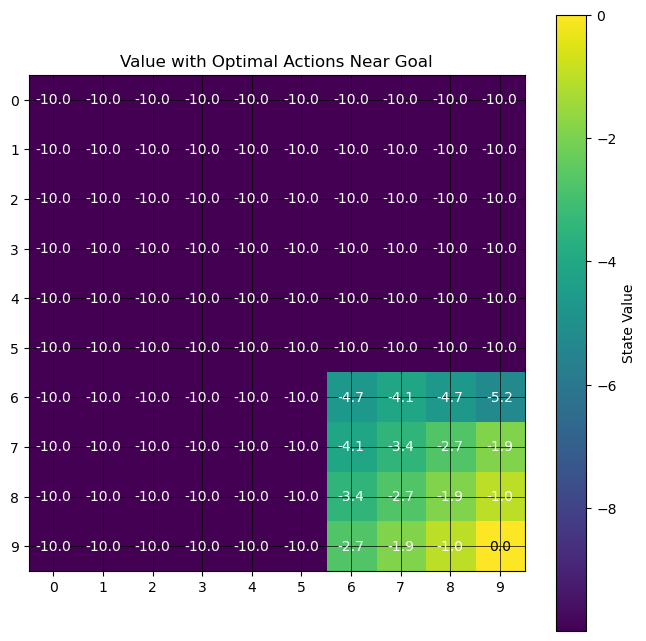

In [19]:
# Task 3
# Set optimal actions within 2 states of the goal
for i in range(7, 10):
    for j in range(7, 10):
        if i < 9: policy[i, j] = 'down'
        if j < 9: policy[i, j] = 'right'

# Re-evaluate policy with optimal actions near the goal
V_optimal_near_goal = policy_evaluation(policy, maze, goal_position)

# Plot the maze with state values
def plot_maze_with_values(V, title="Value with Optimal Actions Near Goal"):
    plt.figure(figsize=(8, 8))
    plt.imshow(V, cmap="viridis", origin="upper")
    plt.colorbar(label="State Value")
    plt.title(title)
    plt.xticks(range(V.shape[1]))
    plt.yticks(range(V.shape[0]))
    plt.grid(visible=True, which='both', color='black', linestyle='-', linewidth=0.5)

    # Annotate each cell with its value
    for i in range(V.shape[0]):
        for j in range(V.shape[1]):
            plt.text(j, i, f"{V[i, j]:.1f}", ha='center', va='center', color="white" if V[i, j] < 0 else "black")

    plt.show()

# Plot the updated value function with annotations
plot_maze_with_values(V_optimal_near_goal, title="Value with Optimal Actions Near Goal")


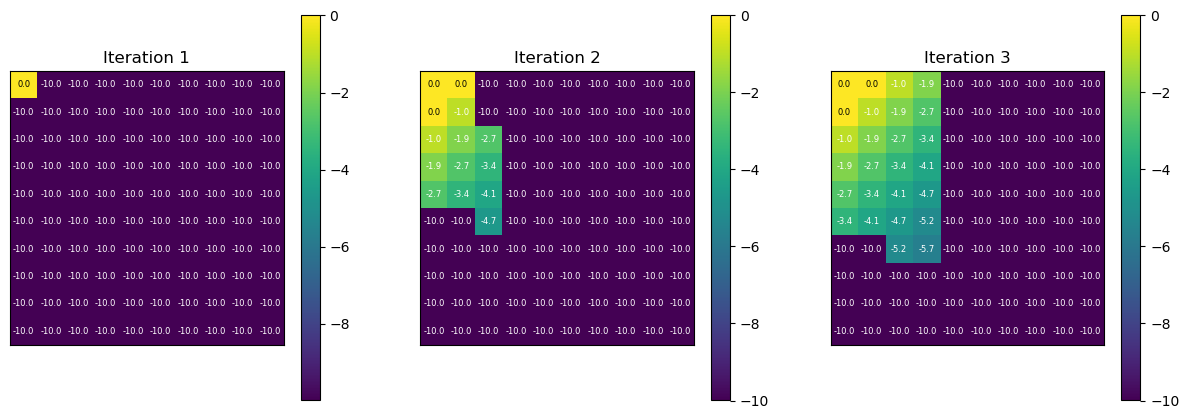

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Define the step function for Policy Iteration
def step(state, action, maze, goal_position):
    i, j = state
    if action == 'up': 
        next_state = (max(i-1, 0), j)
    elif action == 'down': 
        next_state = (min(i+1, maze.shape[0]-1), j)
    elif action == 'left': 
        next_state = (i, max(j-1, 0))
    elif action == 'right': 
        next_state = (i, min(j+1, maze.shape[1]-1))
    else:
        raise ValueError("Invalid action")
    
    # Reward is 0 at the goal position, otherwise -1
    reward = 0 if next_state == goal_position else -1
    return next_state, reward

# Policy Iteration Algorithm
def policy_iteration(maze, goal_position, gamma=0.9, iterations=10):
    # Initialize random policy
    actions = ['up', 'down', 'left', 'right']
    policy = np.random.choice(actions, size=maze.shape)
    V = np.zeros(maze.shape)  # Initialize value function

    snapshots = []  # To store snapshots of V for visualization

    for it in range(iterations):
        # Policy Evaluation
        for _ in range(100):  # Fixed number of evaluation steps
            for i in range(maze.shape[0]):
                for j in range(maze.shape[1]):
                    state = (i, j)
                    if state == goal_position:
                        V[i, j] = 0
                        continue
                    action = policy[i, j]
                    next_state, reward = step(state, action, maze, goal_position)
                    V[i, j] = reward + gamma * V[next_state]

        # Save snapshots for visualization
        if it in [0, 1, 2]:  # Save the first 3 iterations
            snapshots.append(V.copy())

        # Policy Improvement
        for i in range(maze.shape[0]):
            for j in range(maze.shape[1]):
                state = (i, j)
                if state == goal_position:
                    continue
                values = {}
                for action in actions:
                    next_state, reward = step(state, action, maze, goal_position)
                    values[action] = reward + gamma * V[next_state]
                policy[i, j] = max(values, key=values.get)  # Update to best action

    return V, snapshots

# Visualization function for 2D plots
def visualize_snapshots(snapshots, maze):
    fig, axes = plt.subplots(1, len(snapshots), figsize=(15, 5))
    for idx, snapshot in enumerate(snapshots):
        ax = axes[idx]
        cax = ax.matshow(snapshot, cmap='viridis')
        fig.colorbar(cax, ax=ax)
        ax.set_title(f"Iteration {idx + 1}")
        ax.set_xticks([])
        ax.set_yticks([])

        # Annotate each cell with its value (smaller font size)
        for i in range(snapshot.shape[0]):
            for j in range(snapshot.shape[1]):
                ax.text(j, i, f"{snapshot[i, j]:.1f}", ha='center', va='center', color="white" if snapshot[i, j] < 0 else "black", fontsize=6)

    plt.show()

# Define the maze and goal position
maze_size = (10, 10)
maze = np.zeros(maze_size)  # Simple 10x10 maze
goal_position = (0, 0)  # Define goal position

# Run Policy Iteration
V_optimal, snapshots = policy_iteration(maze, goal_position)

# Visualize the snapshots
visualize_snapshots(snapshots, maze)


In [25]:
#Task5

# Define Step function
def step(state, action, maze, goal_position):
    i, j = state
    maze_size = maze.shape

    # Determine the next state based on action
    if action == 'up':
        next_state = (max(i - 1, 0), j) 
    elif action == 'down':
        next_state = (min(i + 1, maze_size[0] - 1), j)  
    elif action == 'left':
        next_state = (i, max(j - 1, 0))  
    elif action == 'right':
        next_state = (i, min(j + 1, maze_size[1] - 1)) 
    else:
        next_state = state 

    # Check the next state
    if maze[next_state] == -1: 
        next_state = state 
        reward = -10  
    elif next_state == goal_position: 
        reward = 10  
    else:
        reward = -1  

    return next_state, reward


In [27]:
# Generating trajectories
def generate_random_trajectories(maze, goal_position, num_trajectories=10, max_steps=20):
    trajectories = []
    actions = ['up', 'down', 'left', 'right']
    maze_size = maze.shape

    for _ in range(num_trajectories):
        # Random start state 
        while True:
            state = (random.randint(0, maze_size[0] - 1), random.randint(0, maze_size[1] - 1))
            if maze[state] != -1 and state != goal_position:
                break

        trajectory = [state]

        for _ in range(max_steps):
            if state == goal_position:
                break 
            action = random.choice(actions)
            state, _ = step(state, action, maze, goal_position)
            trajectory.append(state)

        trajectories.append(trajectory)

    return trajectories


In [29]:
def generate_optimal_trajectories(maze, goal_position, policy, num_trajectories=10, max_steps=20):
    trajectories = []
    maze_size = maze.shape

    for _ in range(num_trajectories):
        # Random start state (ensure it's not the goal or a fence)
        while True:
            state = (random.randint(0, maze_size[0] - 1), random.randint(0, maze_size[1] - 1))
            if maze[state] != -1 and state != goal_position:
                break

        trajectory = [state]

        for _ in range(max_steps):
            if state == goal_position:
                break  
            action = policy[state]
            state, _ = step(state, action, maze, goal_position)
            trajectory.append(state)

        trajectories.append(trajectory)

    return trajectories


In [31]:
# Random policy
actions = ['up', 'down', 'left', 'right']
random_policy = np.random.choice(actions, size=maze.shape)

# Example random trajectories
random_trajectories = generate_random_trajectories(maze, goal_position, num_trajectories=10)
print("Random Policy Trajectories:")
for i, traj in enumerate(random_trajectories):
    print(f"Trajectory {i + 1}: {traj}")

# Example optimal policy (from Task 4)
optimal_policy = np.random.choice(actions, size=maze.shape)  # Replace with Task 4's actual policy
optimal_trajectories = generate_optimal_trajectories(maze, goal_position, optimal_policy, num_trajectories=10)
print("\nOptimal Policy Trajectories:")
for i, traj in enumerate(optimal_trajectories):
    print(f"Trajectory {i + 1}: {traj}")

Random Policy Trajectories:
Trajectory 1: [(5, 0), (5, 1), (5, 2), (5, 1), (5, 2), (4, 2), (4, 1), (4, 2), (4, 3), (5, 3), (4, 3), (4, 2), (3, 2), (3, 1), (2, 1), (2, 1), (2, 0), (1, 0), (2, 0), (3, 0), (2, 0)]
Trajectory 2: [(2, 1), (3, 1), (3, 2), (3, 2), (3, 1), (3, 0), (3, 0), (4, 0), (4, 0), (3, 0), (2, 0), (2, 0), (2, 0), (2, 1), (3, 1), (3, 0), (3, 1), (2, 1), (3, 1), (3, 0), (2, 0)]
Trajectory 3: [(6, 4), (6, 3), (5, 3), (6, 3), (6, 4), (6, 3), (7, 3), (7, 2), (7, 1), (8, 1), (9, 1), (9, 2), (9, 1), (9, 1), (9, 2), (9, 1), (8, 1), (9, 1), (9, 0), (9, 0), (9, 1)]
Trajectory 4: [(5, 6), (6, 6), (7, 6), (8, 6), (8, 7), (7, 7), (6, 7), (5, 7), (5, 6), (5, 7), (5, 6), (4, 6), (5, 6), (5, 6), (4, 6), (4, 7), (4, 6), (3, 6), (2, 6), (1, 6), (2, 6)]
Trajectory 5: [(2, 9), (1, 9), (1, 9), (1, 8), (1, 7), (0, 7), (0, 8), (0, 8), (1, 8), (2, 8), (1, 8), (1, 9), (1, 8), (0, 8), (1, 8), (1, 7), (0, 7), (1, 7), (1, 6), (0, 6), (1, 6)]
Trajectory 6: [(6, 6), (7, 6), (7, 5), (7, 4), (7, 3), (8

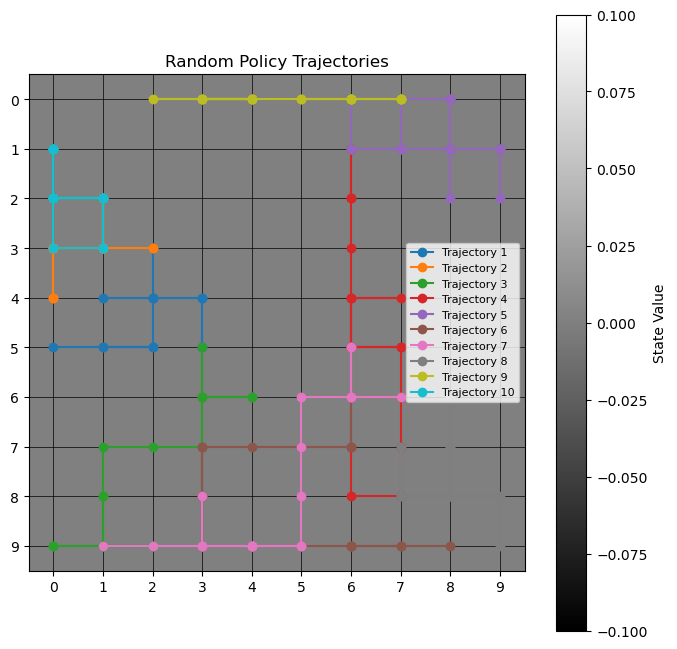

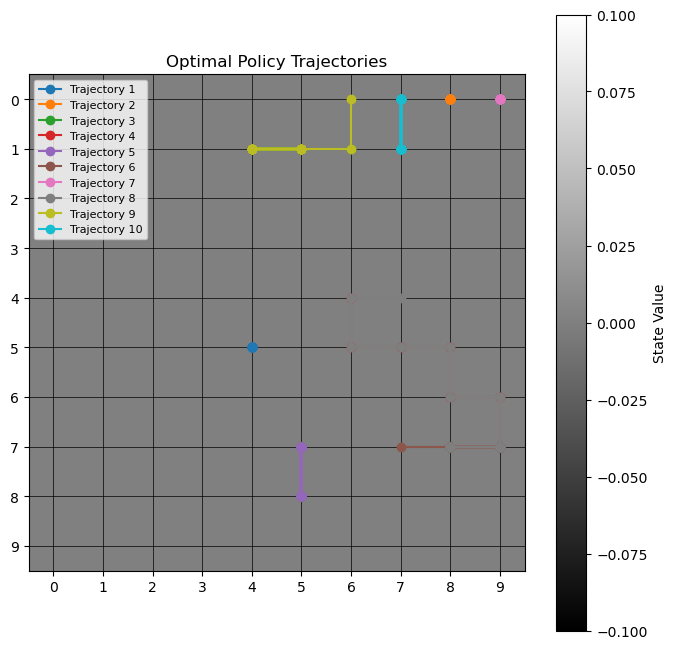

In [37]:
# Plot the Trajectories
import matplotlib.pyplot as plt

def plot_trajectories(maze, trajectories, title="Trajectories in the Maze"):
    """
    Plots trajectories on the maze.

    Parameters:
        maze (np.array): The maze grid.
        trajectories (list): List of trajectories to plot (list of lists of states).
        title (str): Title of the plot.
    """
    plt.figure(figsize=(8, 8))
    
    # Plot the maze layout
    plt.imshow(maze, cmap="gray", origin="upper")
    plt.colorbar(label="State Value")
    plt.title(title)
    plt.xticks(range(maze.shape[1]))
    plt.yticks(range(maze.shape[0]))
    plt.grid(visible=True, which='both', color='black', linestyle='-', linewidth=0.5)
    
    # Plot trajectories
    for traj_idx, trajectory in enumerate(trajectories):
        x_coords = [state[1] for state in trajectory]  # Columns (j)
        y_coords = [state[0] for state in trajectory]  # Rows (i)
        plt.plot(x_coords, y_coords, marker='o', label=f"Trajectory {traj_idx + 1}")
    
    # Mark fences and the goal
    for i in range(maze.shape[0]):
        for j in range(maze.shape[1]):
            if maze[i, j] == -1:  # Fence
                plt.text(j, i, "X", ha='center', va='center', color='red', fontsize=10)
            elif maze[i, j] == 10:  # Goal
                plt.text(j, i, "G", ha='center', va='center', color='green', fontsize=12, fontweight='bold')
    
    # Add a legend and show the plot
    plt.legend(loc="best", fontsize=8)
    plt.show()

# Example: Plot Random Policy Trajectories
plot_trajectories(maze, random_trajectories, title="Random Policy Trajectories")

# Example: Plot Optimal Policy Trajectories
plot_trajectories(maze, optimal_trajectories, title="Optimal Policy Trajectories")


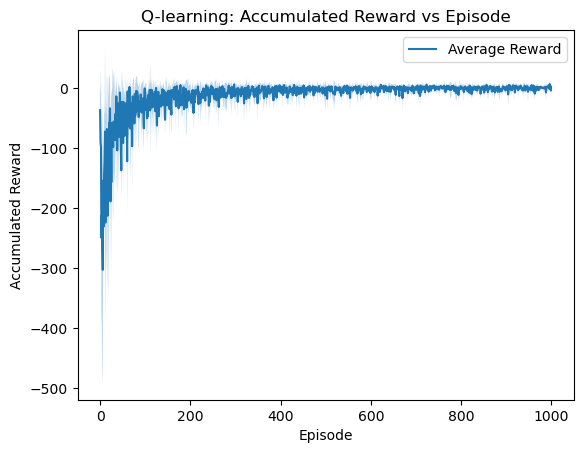

In [33]:
import numpy as np
import random
import matplotlib.pyplot as plt


# Initialize Q-learning parameters
def q_learning(maze, goal_position, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((*maze.shape, 4))  # Q-table with 4 actions per state (up, down, left, right)

    # Mapping actions to indices
    action_map = {'up': 0, 'down': 1, 'left': 2, 'right': 3}
    reverse_action_map = {v: k for k, v in action_map.items()}

    # Q-learning loop
    rewards = []
    for ep in range(episodes):
        state = (random.randint(0, maze.shape[0] - 1), random.randint(0, maze.shape[1] - 1))
        total_reward = 0

        while state != goal_position:
            # Choose action (epsilon-greedy)
            if random.uniform(0, 1) < epsilon:
                action = random.choice(list(action_map.keys()))
            else:
                action = reverse_action_map[np.argmax(Q[state])]

            # Take action, observe next state and reward
            next_state, reward = step(state, action, maze, goal_position)
            total_reward += reward

            # Q-value update
            action_idx = action_map[action]
            best_next_action = np.argmax(Q[next_state])
            Q[state][action_idx] += alpha * (reward + gamma * Q[next_state][best_next_action] - Q[state][action_idx])
            state = next_state

        rewards.append(total_reward)

    return Q, rewards

# Plot accumulated rewards across multiple runs
def plot_rewards(reward_runs):
    avg_rewards = np.mean(reward_runs, axis=0)
    std_rewards = np.std(reward_runs, axis=0)

    plt.plot(avg_rewards, label="Average Reward")
    plt.fill_between(range(len(avg_rewards)), avg_rewards - std_rewards, avg_rewards + std_rewards, alpha=0.3)
    plt.xlabel('Episode')
    plt.ylabel('Accumulated Reward')
    plt.title('Q-learning: Accumulated Reward vs Episode')
    plt.legend()
    plt.show()

# Define the maze and goal position
maze_size = (10, 10)  # 10x10 maze
maze = np.zeros(maze_size)  # Simple maze without obstacles
goal_position = (0, 0)  # Goal state at the top-left corner

# Run Q-learning 5 times
reward_runs = []
for _ in range(5):
    _, rewards = q_learning(maze, goal_position, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1)
    reward_runs.append(rewards)

# Plot accumulated rewards for the 5 runs
plot_rewards(reward_runs)


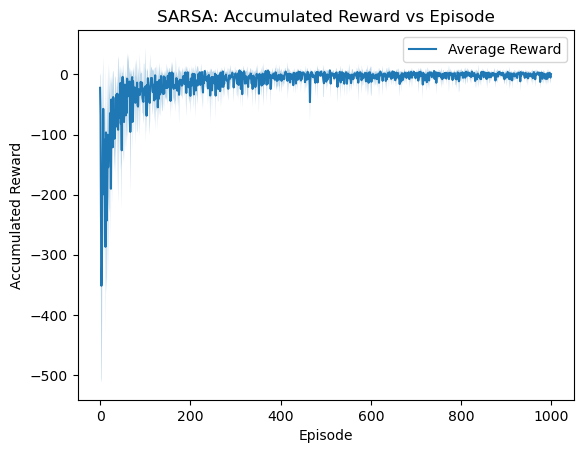

In [35]:
import numpy as np
import random
import matplotlib.pyplot as plt


# Initialize SARSA parameters
def sarsa(maze, goal_position, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((*maze.shape, 4))  # Q-table with 4 actions per state (up, down, left, right)

    # Mapping actions to indices
    action_map = {'up': 0, 'down': 1, 'left': 2, 'right': 3}
    reverse_action_map = {v: k for k, v in action_map.items()}

    # SARSA loop
    rewards = []
    for ep in range(episodes):
        state = (random.randint(0, maze.shape[0] - 1), random.randint(0, maze.shape[1] - 1))
        
        # Choose initial action based on epsilon-greedy
        if random.uniform(0, 1) < epsilon:
            action = random.choice(list(action_map.keys()))
        else:
            action = reverse_action_map[np.argmax(Q[state])]

        total_reward = 0

        while state != goal_position:
            # Take action, observe next state and reward
            next_state, reward = step(state, action, maze, goal_position)
            total_reward += reward

            # Choose next action based on epsilon-greedy
            if random.uniform(0, 1) < epsilon:
                next_action = random.choice(list(action_map.keys()))
            else:
                next_action = reverse_action_map[np.argmax(Q[next_state])]

            # Update Q-value using SARSA formula
            action_idx = action_map[action]
            next_action_idx = action_map[next_action]
            Q[state][action_idx] += alpha * (reward + gamma * Q[next_state][next_action_idx] - Q[state][action_idx])

            # Move to the next state and action
            state = next_state
            action = next_action

        rewards.append(total_reward)

    return Q, rewards

# Plot accumulated rewards across multiple runs
def plot_rewards(reward_runs):
    avg_rewards = np.mean(reward_runs, axis=0)
    std_rewards = np.std(reward_runs, axis=0)

    plt.plot(avg_rewards, label="Average Reward")
    plt.fill_between(range(len(avg_rewards)), avg_rewards - std_rewards, avg_rewards + std_rewards, alpha=0.3)
    plt.xlabel('Episode')
    plt.ylabel('Accumulated Reward')
    plt.title('SARSA: Accumulated Reward vs Episode')
    plt.legend()
    plt.show()

# Define the maze and goal position
maze_size = (10, 10)  # 10x10 maze
maze = np.zeros(maze_size)  # Simple maze without obstacles
goal_position = (0, 0)  # Goal state at the top-left corner

# Run SARSA 5 times
reward_runs = []
for _ in range(5):
    _, rewards = sarsa(maze, goal_position, episodes=1000, alpha=0.1, gamma=0.9, epsilon=0.1)
    reward_runs.append(rewards)

# Plot accumulated rewards for the 5 runs
plot_rewards(reward_runs)
